System prerequisities

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn
#!pip install hdbscan
#!pip3 install kneed

Local libraries


In [2]:
import numpy as np
import pandas as pd
import itertools
from itertools import combinations
import traceback
from scipy import stats
import pickle
import warnings
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap
from pylab import rcParams
import time

import sklearn.cluster as cluster

from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing 
from sklearn.preprocessing import label_binarize,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV,RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,jaccard_score,f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.impute import SimpleImputer

from sklearn.datasets import make_classification #fetch_openml,load_iris,
from sklearn.multioutput import ClassifierChain
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])


warnings.filterwarnings('ignore')

global warning
global y_codes

y_codes =[]
%matplotlib inline

Importing Data

In [3]:
A1_df = pd.read_csv('NORMAL_training_data.csv', delimiter='\t')
A2_df = pd.read_csv('ATTACK1_training_data.csv', delimiter='\t')
A3_df = pd.read_csv('ATTACK2_training_data.csv', delimiter='\t')
A4_df = pd.read_csv('RESPONSES_training_data.csv', delimiter='\t')
df = pd.concat([A1_df, A2_df, A3_df, A4_df], ignore_index=True)
df_bkp = pd.concat([A1_df, A2_df, A3_df, A4_df], ignore_index=True)

Cleaning Data - Removing NAN vlaues 

In [4]:
print ('Value counts:')
df['Traffic Type'].value_counts()

Value counts:


ATTACK2      3263
ATTACK1      2749
NORMAL       2055
RESPONSES    1539
Name: Traffic Type, dtype: int64

Cleaning data - Droping UNIQUE ID Column   

In [5]:
df.drop('Unique Id', axis=1, inplace=True)
df.drop('N-GRAMS_3', axis=1, inplace=True)
df.drop('N-GRAMS_4', axis=1, inplace=True)
df.drop('N-GRAMS_5', axis=1, inplace=True)
df.drop('N-GRAMS_6', axis=1, inplace=True)

In [6]:
names = df.columns.tolist()
print(names)

['TTL Value', 'Sum N-Gram Vectorizer', 'Average N-Gram-Feature', 'Tfidf Delta', 'Feature Count', 'N-GRAMS_DELTA_3', 'N-GRAMS_DELTA_4', 'N-GRAMS_DELTA_5', 'N-GRAMS_DELTA_6', 'Traffic Type']


In [7]:
df.dropna(inplace=True)

In [8]:
# sorting by first name 
df.sort_values("Traffic Type", inplace = True) 
  
# dropping ALL duplicte values 
df.drop_duplicates(keep='last') 
  

,TTL Value,Sum N-Gram Vectorizer,Average N-Gram-Feature,Tfidf Delta,Feature Count,N-GRAMS_DELTA_3,N-GRAMS_DELTA_4,N-GRAMS_DELTA_5,N-GRAMS_DELTA_6,Traffic Type
4802,101,54,1.000000,2.722179,54,15,14,13,12,ATTACK1
3210,102,158,1.000000,4.236916,158,41,40,39,38,ATTACK1
3213,102,222,1.000000,5.235403,222,57,56,55,54,ATTACK1
3170,101,194,1.000000,4.913538,194,50,49,48,47,ATTACK1
3172,101,178,1.000000,4.662172,178,46,45,44,43,ATTACK1
...,...,...,...,...,...,...,...,...,...,...
8580,64,674,1.218807,4.495292,553,170,169,168,167,RESPONSES
8579,64,674,1.218807,4.455899,553,170,169,168,167,RESPONSES
8578,64,674,1.218807,4.446954,553,170,169,168,167,RESPONSES
8642,64,674,1.218807,4.507625,553,170,169,168,167,RESPONSES


In [9]:
print ('Value counts:')
df['Traffic Type'].value_counts()

Value counts:


ATTACK2      3263
ATTACK1      2749
NORMAL       2055
RESPONSES    1539
Name: Traffic Type, dtype: int64

Data overview

In [10]:
print(df.shape)

(9606, 10)


In [11]:
print(df.head(10))

      TTL Value  Sum N-Gram Vectorizer  Average N-Gram-Feature  Tfidf Delta  \
4802        101                     54                     1.0     2.722179   
3207        102                    198                     1.0     4.942275   
3206        102                    174                     1.0     4.461043   
3205        102                    174                     1.0     4.461043   
3204        102                    194                     1.0     4.828079   
3203        102                    194                     1.0     4.828079   
3202        102                    174                     1.0     4.501784   
3208        102                    198                     1.0     4.942275   
3201        102                    202                     1.0     4.888930   
3199        102                    170                     1.0     4.426352   

      Feature Count  N-GRAMS_DELTA_3  N-GRAMS_DELTA_4  N-GRAMS_DELTA_5  \
4802             54               15               14   

Describing Data - DETAILS

In [12]:
df.describe()

,TTL Value,Sum N-Gram Vectorizer,Average N-Gram-Feature,Tfidf Delta,Feature Count,N-GRAMS_DELTA_3,N-GRAMS_DELTA_4,N-GRAMS_DELTA_5,N-GRAMS_DELTA_6
count,9606.000000,9606.000000,9606.000000,9606.000000,9606.000000,9606.000000,9606.000000,9606.000000,9606.000000
mean,95.374453,247.285863,1.133068,4.346322,190.103581,63.321466,62.321466,61.321466,60.321466
std,13.711689,309.832537,0.439115,0.772945,124.591183,77.458134,77.458134,77.458134,77.458134
min,64.000000,10.000000,1.000000,2.121320,10.000000,4.000000,3.000000,2.000000,1.000000
25%,101.000000,142.000000,1.000000,3.975535,142.000000,37.000000,36.000000,35.000000,34.000000
50%,101.000000,170.000000,1.000000,4.507625,170.000000,44.000000,43.000000,42.000000,41.000000
75%,102.000000,194.000000,1.000000,4.772127,194.000000,50.000000,49.000000,48.000000,47.000000
max,102.000000,2586.000000,6.089623,6.140415,1626.000000,648.000000,647.000000,646.000000,645.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9606 entries, 4802 to 9605
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TTL Value               9606 non-null   int64  
 1   Sum N-Gram Vectorizer   9606 non-null   int64  
 2   Average N-Gram-Feature  9606 non-null   float64
 3   Tfidf Delta             9606 non-null   float64
 4   Feature Count           9606 non-null   int64  
 5   N-GRAMS_DELTA_3         9606 non-null   int64  
 6   N-GRAMS_DELTA_4         9606 non-null   int64  
 7   N-GRAMS_DELTA_5         9606 non-null   int64  
 8   N-GRAMS_DELTA_6         9606 non-null   int64  
 9   Traffic Type            9606 non-null   object 
dtypes: float64(2), int64(7), object(1)
memory usage: 788.0+ KB


The following features and classes will be used in the model 

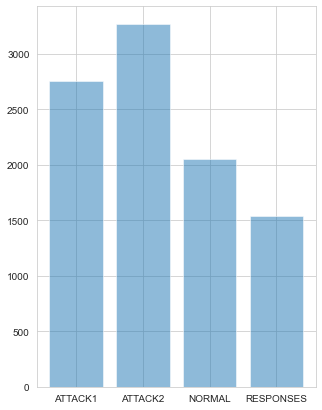

In [14]:
types= df['Traffic Type'].unique().tolist() 

rcParams['figure.figsize'] = 5, 7

performance = df.groupby(by="Traffic Type").size()
y_pos = np.arange(len(types))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, types)
plt.show()

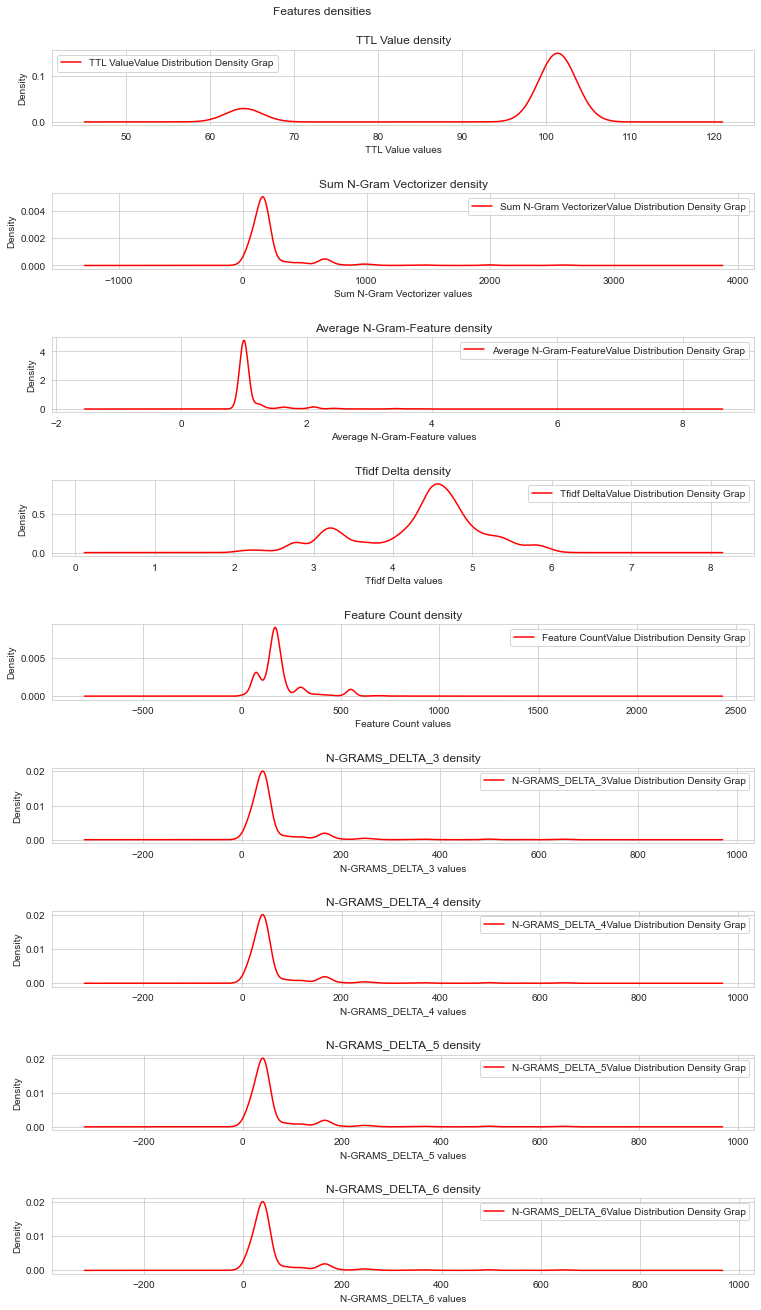

In [15]:
def plot_densities(data):
    '''
    Plot features densities depending on the outcome values
    '''
    # change fig size to fit all subplots beautifully 
    rcParams['figure.figsize'] = 15, 20

    # init figure
    fig, axs = plt.subplots(len(names)-1, 1)
    fig.suptitle('Features densities')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95,
                        wspace = 0.2, hspace = 0.9)

    # plot densities for outcomes
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        df[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + 'Value Distribution Density Grap')

        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')     
        
    plt.show()

# plot correlation & densities
plot_densities(df)

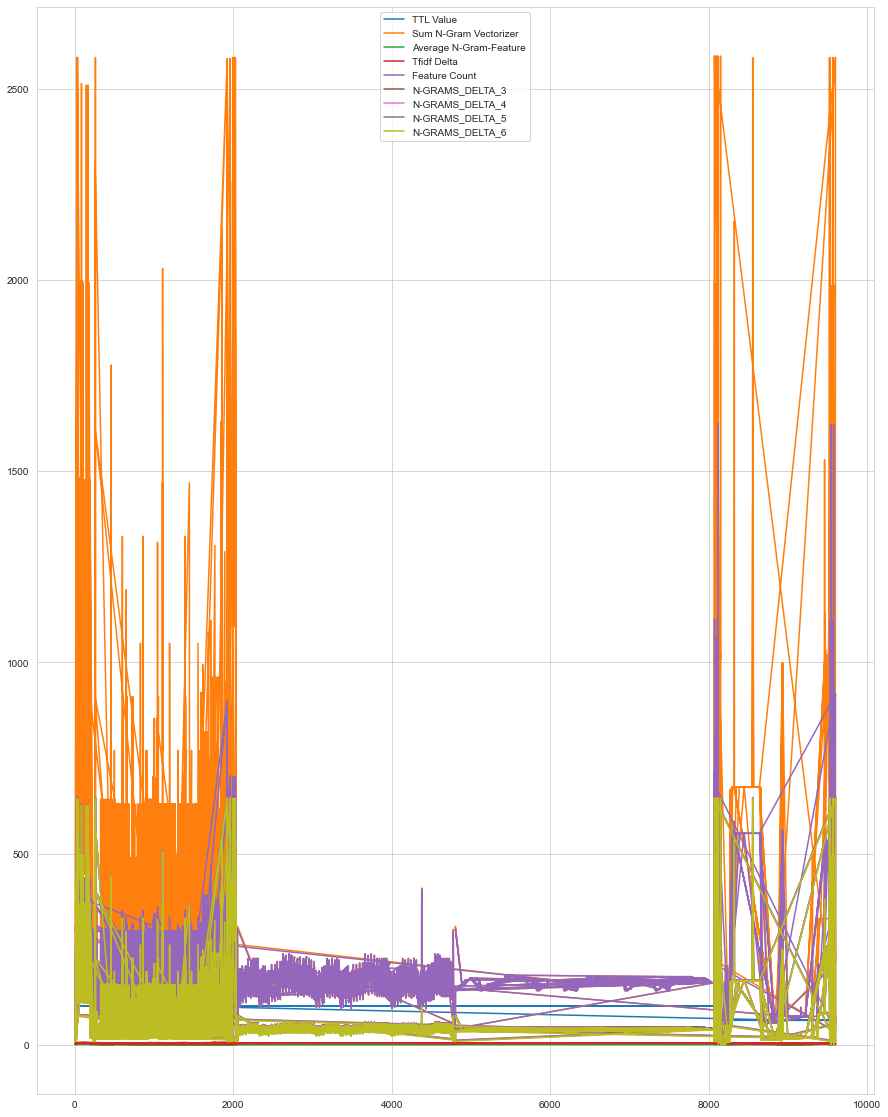

In [16]:
df.plot()
rcParams['figure.figsize'] = 5, 7
plt.show()

Distribution matrix of each attribute - count of the number of observations in each bin

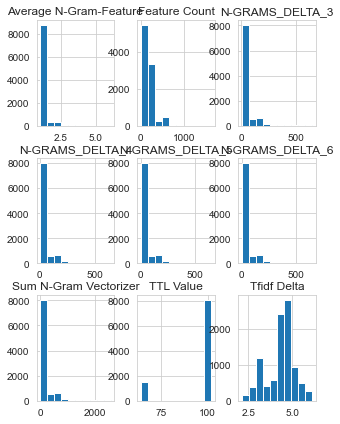

In [17]:
df.hist()
rcParams['figure.figsize'] = 5, 7
plt.show()

Distribution matrix of each attribute

Correlation matrix show relations between two variables. If two variables change in the same direction they are positively correlated.

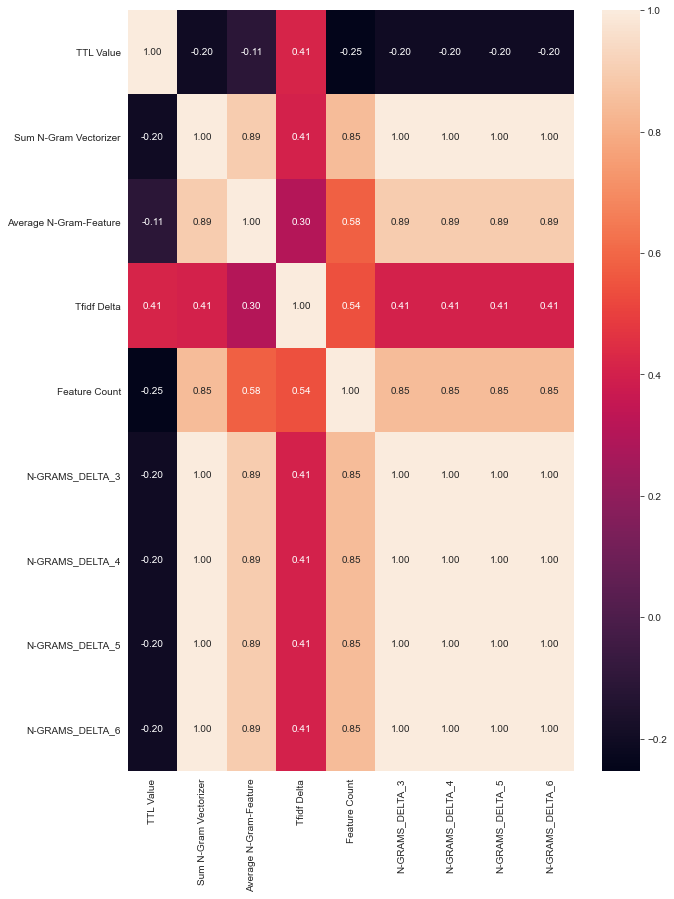

In [18]:
def plot_correlation(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # init figure size
    rcParams['figure.figsize'] = 10, 14
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()

# plot correlation & densities
plot_correlation(df)

A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute.

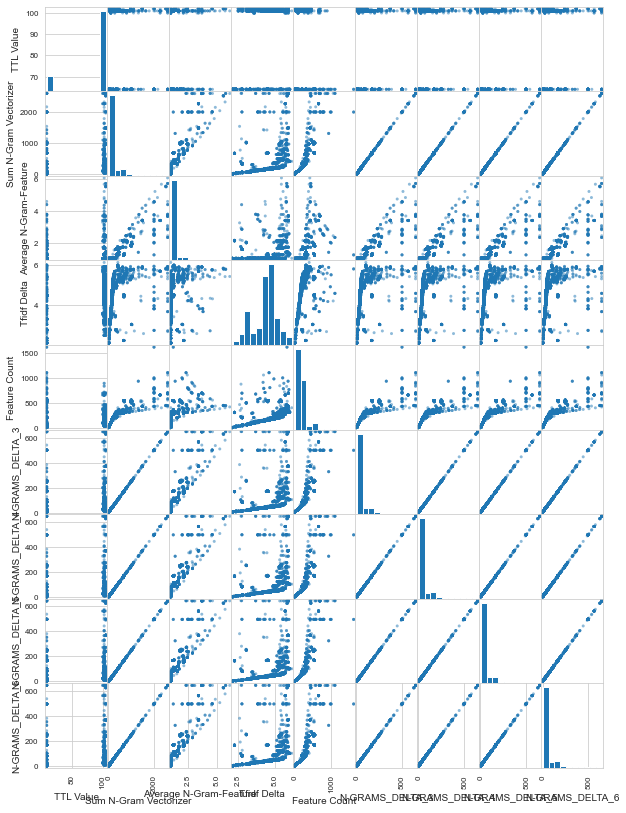

In [19]:
scatter_matrix(df)
rcParams['figure.figsize'] = 10, 14
plt.show()

The type of the traffic column is object. We will convert this to a category so we can use `.cat` functionalities (Functions specific to categories).

Putting 50% of test data 

In [20]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4803, 9) (4803,)
Test set: (4803, 9) (4803,)


In [21]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [22]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.736830 (0.027683)
LDA: 0.901933 (0.007098)
KNN: 0.987298 (0.005057)
CART: 0.993128 (0.004569)
NB: 0.968349 (0.006182)
SVM: 0.982510 (0.005979)


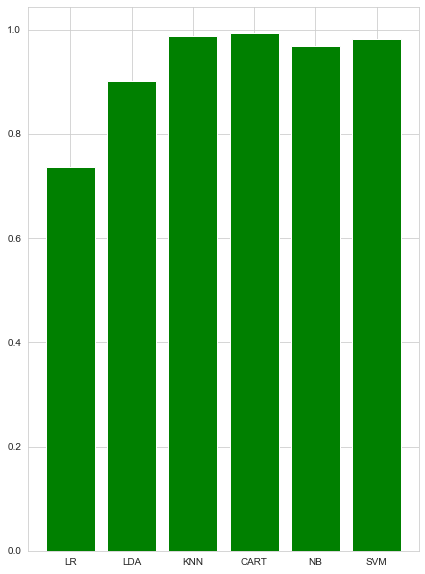

In [23]:
results = []
names = []
mean =[]
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    mean.append(cv_results.mean())
    print(msg)

rcParams['figure.figsize'] = 7, 10
x = np.arange(len(names))
plt.bar(x,mean,color='green', align='center')
plt.xticks(x, names)
plt.show()

From above results we can establish that SVM and KNN clasifiers are performing better than others  

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable.


The SVM algorithm offers a choice of kernel functions 
**1.Linear**
**2.Radial basis function (RBF)**


In [24]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

#df['Traffic Type'] = df['Traffic Type'].astype('category')

Reducing test data 

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X, y,train_size=0.1 ,test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (960, 9) (960,)
Test set: (1922, 9) (1922,)


In [26]:
#Parameter Tunning This example shows how to perform univariate feature selection before running a SVC (support vector classifier) to improve the classification scores. We use the iris dataset (4 features) and add 36 non-informative features. We can find that our model achieves best performance when we select around 10% of features.

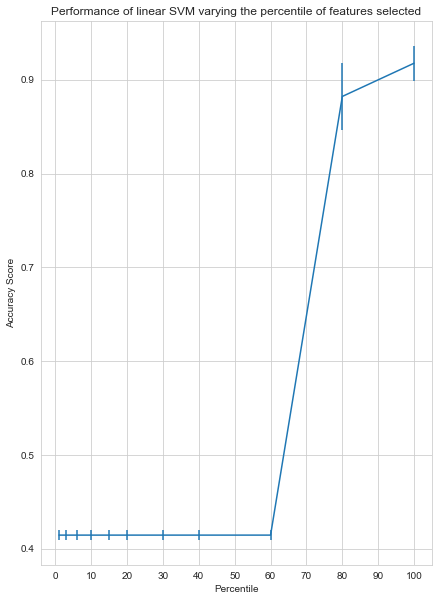

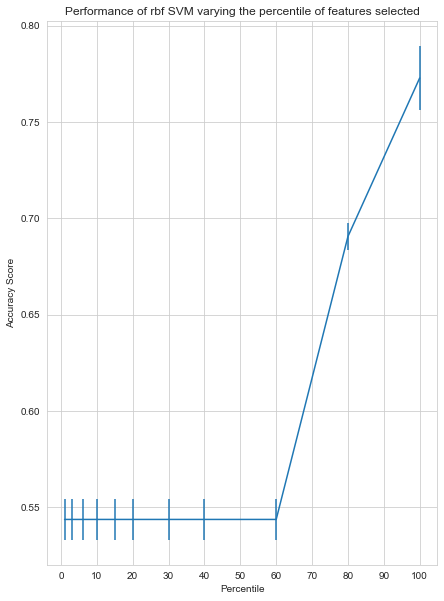

In [27]:
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for kernel in ('linear','rbf'):
    clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('scaler', StandardScaler()),
                ('svc', SVC(kernel=kernel, gamma="auto"))])    
    
    for percentile in percentiles:
        clf.set_params(anova__percentile=percentile)
        this_scores = cross_val_score(clf, X_train, y_train)
        score_means.append(this_scores.mean())
        score_stds.append(this_scores.std())

    plt.errorbar(percentiles, score_means, np.array(score_stds))
    plt.title( 'Performance of '+ kernel +' SVM varying the percentile of features selected')
    plt.xticks(np.linspace(0, 100, 11, endpoint=True))
    plt.xlabel('Percentile')
    plt.ylabel('Accuracy Score')
    plt.axis('tight')
    plt.show()
    score_means.clear()
    score_stds.clear()
    
    

In [28]:
rcParams['figure.figsize'] = 6, 10

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=None,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

              precision    recall  f1-score   support

     ATTACK1       0.97      0.96      0.97       536
     ATTACK2       0.91      1.00      0.95       668
      NORMAL       0.97      0.83      0.90       408
   RESPONSES       1.00      1.00      1.00       310

    accuracy                           0.95      1922
   macro avg       0.96      0.95      0.95      1922
weighted avg       0.95      0.95      0.95      1922

linear - Accuracy: 95.27% 

Confusion matrix, without normalization


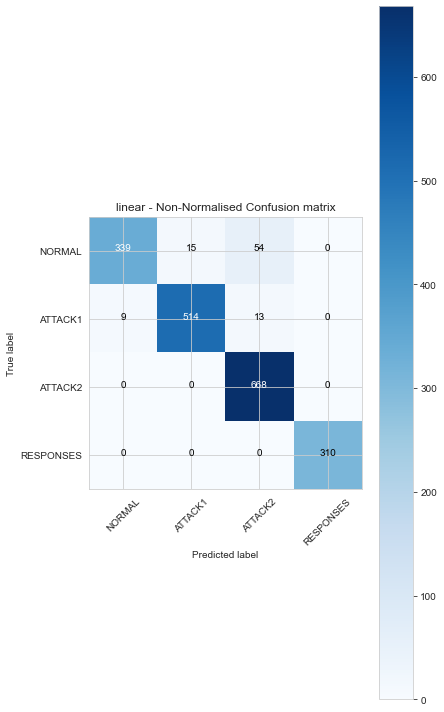

              precision    recall  f1-score   support

     ATTACK1       1.00      0.95      0.98       536
     ATTACK2       0.99      1.00      0.99       668
      NORMAL       0.89      1.00      0.94       408
   RESPONSES       1.00      0.91      0.95       310

    accuracy                           0.97      1922
   macro avg       0.97      0.96      0.97      1922
weighted avg       0.97      0.97      0.97      1922

rbf - Accuracy: 97.09% 

Confusion matrix, without normalization


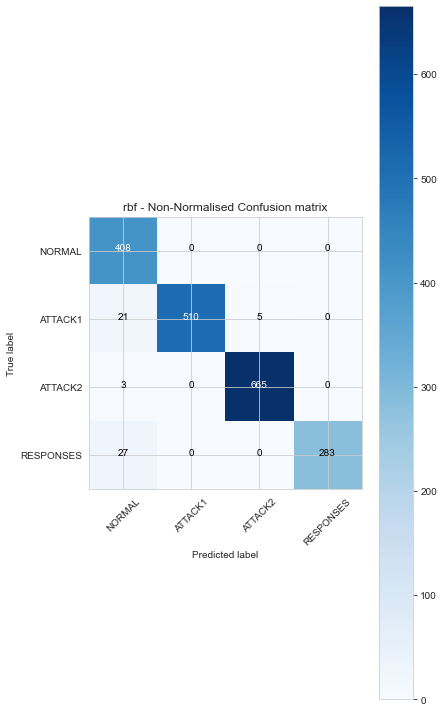

In [30]:
for kernel in ('linear','rbf'):
    svm = SVC(kernel=kernel, gamma=10)
    svm.fit(X_train, y_train)
    yy = svm.predict(X_test)
    
    cnf_matrix = confusion_matrix(y_test, yy, labels=['NORMAL','ATTACK1','ATTACK2','RESPONSES'])
    np.set_printoptions(precision=5)
    print (classification_report(y_test, yy))
    print(kernel + ' - Accuracy: %.2f%% \n' % (accuracy_score(yy,y_test)*100))

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['NORMAL','ATTACK1','ATTACK2','RESPONSES'],normalize= False, title=str(kernel)+' - Non-Normalised Confusion matrix')
    


In [31]:
f1_score(y_test, yy, average='weighted',labels=np.unique(yy)) 
    

0.971159298727581

In [32]:
jaccard_score(y_test, yy, average='weighted',labels=np.unique(yy))

0.9447066087568722

              precision    recall  f1-score   support

     ATTACK1       1.00      0.95      0.98       536
     ATTACK2       0.99      1.00      0.99       668
      NORMAL       0.89      1.00      0.94       408
   RESPONSES       1.00      0.91      0.95       310

    accuracy                           0.97      1922
   macro avg       0.97      0.96      0.97      1922
weighted avg       0.97      0.97      0.97      1922

rbf - Accuracy: 97.09%

Normalized confusion matrix


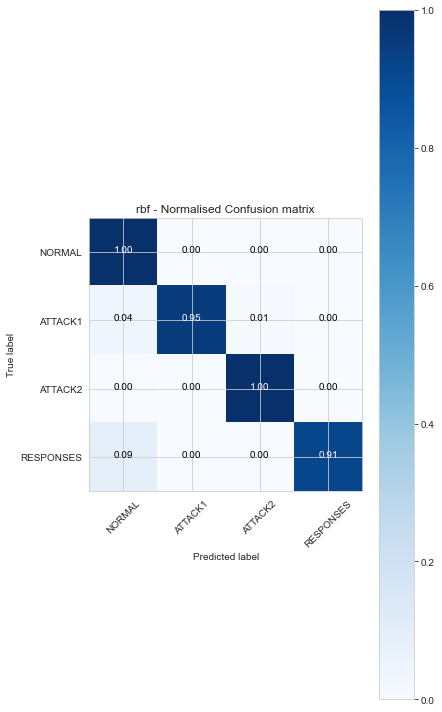

              precision    recall  f1-score   support

     ATTACK1       0.97      0.96      0.97       536
     ATTACK2       0.91      1.00      0.95       668
      NORMAL       0.97      0.83      0.90       408
   RESPONSES       1.00      1.00      1.00       310

    accuracy                           0.95      1922
   macro avg       0.96      0.95      0.95      1922
weighted avg       0.95      0.95      0.95      1922

linear - Accuracy: 95.27%

Normalized confusion matrix


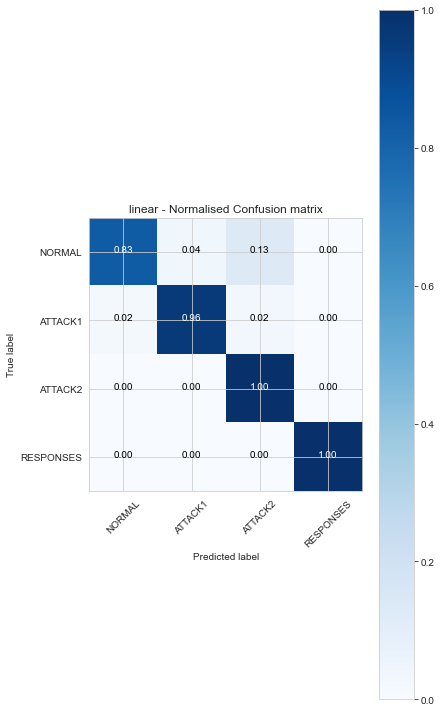

In [33]:
for kernel in ('rbf','linear'):
    svm = SVC(kernel=kernel, gamma=10)
    svm.fit(X_train, y_train)
    yy = svm.predict(X_test)
    
    cnf_matrix = confusion_matrix(y_test, yy,labels=['NORMAL','ATTACK1','ATTACK2','RESPONSES'])
    np.set_printoptions(precision=5)
    print (classification_report(y_test, yy))
    print(kernel + ' - Accuracy: %.2f%%\n' % (accuracy_score(yy,y_test)*100))

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['NORMAL','ATTACK1','ATTACK2','RESPONSES'],normalize= True, title=str(kernel)+' - Normalised Confusion matrix')
        


In [34]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

Length of list 30
Max of list 0.9702279526534859
Length of list 30
Max of list 0.9702279526534859
Length of list 30
Max of list 0.9644038328130419
Length of list 30
Max of list 0.9688729188345473
Length of list 30
Max of list 0.9688729188345473
Length of list 30
Max of list 0.9676229188345475


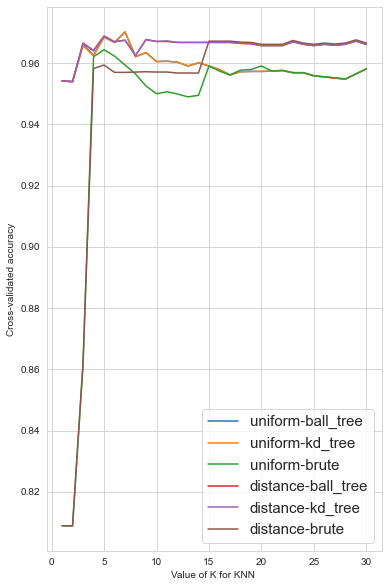

In [35]:
# search for an optimal value of K for KNN
rcParams['figure.figsize'] = 6, 10
# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

for w in ['uniform', 'distance']:
    
    for a in ['ball_tree', 'kd_tree', 'brute']:
    
# 1. we will loop through reasonable values of k
        for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
            knn = KNeighborsClassifier(n_neighbors=k,weights=w, algorithm=a)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
            scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
            k_scores.append(scores.mean())
    
        print('Length of list', len(k_scores))
        print('Max of list', max(k_scores))

        plt.plot(k_range, k_scores, label=w +"-" + a)
        plt.xlabel('Value of K for KNN ')
        plt.ylabel('Cross-validated accuracy')
        plt.legend(loc="best", fontsize=15)
        k_scores.clear()

In [36]:
def accuracy(k, X_tra, y_tra, X_te, y_te):
    '''
    compute accuracy of the classification based on k values 
    '''
    # instantiate learning model and fit data
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree' )    
    knn.fit(X_tra, y_tra)

    # predict the response
    pred = knn.predict(X_te)

    # evaluate and return  accuracy
    return accuracy_score(y_te, pred)

In [37]:
def classify_and_plot(X, y, n):
    ''' 
    split data, fit, classify, plot and evaluate results 
    '''
    # split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 41)

    # init vars
    
    n_neighbors = n
    
    #n_neighbors = 5
    h           = .02  # step size in the mesh



    rcParams['figure.figsize'] = 5, 5
    
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights, algorithm='kd_tree' )
        knn.fit(X_train, y_train)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        fig = plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')

        # Plot also the training points, x-axis = 'Glucose', y-axis = "BMI"
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)   
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("KNN Main two feautres classification (k = %i, weights = '%s')" % (n_neighbors, weights))
        plt.show()


        # evaluate
        y_test
        yy= knn.predict(X_test)

        # print results
        print('----------------------------------------------------------------------')
        print('Classification report')
        print('----------------------------------------------------------------------')
        print('\n', classification_report(y_test, yy))
        print('----------------------------------------------------------------------')
        print('Accuracy: %.2f%%\n' % (accuracy_score(y_test, yy)*100))
        print('----------------------------------------------------------------------')


        #https://stackoverflow.com/questions/56153726/plot-k-nearest-neighbor-graph-with-8-features

For best accuracy using k =  4


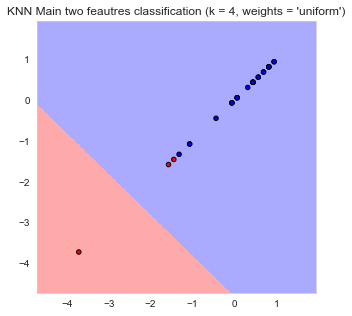

----------------------------------------------------------------------
Classification report
----------------------------------------------------------------------

               precision    recall  f1-score   support

          31       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          41       0.00      0.00      0.00         2
          42       0.00      0.00      0.00         0
          44       0.00      0.00      0.00         1
          45       0.33      1.00      0.50         1
          46       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         1
          48       0.50      1.00      0.67         2
          49       0.00      0.00      0.00         1

    accuracy                           0.30        10
   macro avg       0.08      0.20      0.12        10
weighted avg       0.13      0.30      0.18        10

----------------------------------------------------------------------
Accu

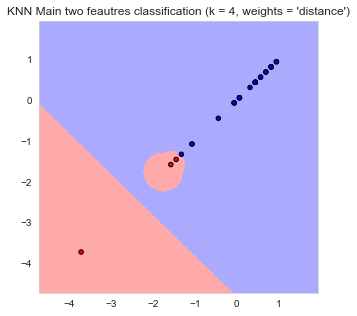

----------------------------------------------------------------------
Classification report
----------------------------------------------------------------------

               precision    recall  f1-score   support

          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         1
          41       1.00      1.00      1.00         2
          44       0.00      0.00      0.00         1
          45       0.50      1.00      0.67         1
          46       1.00      1.00      1.00         1
          47       1.00      1.00      1.00         1
          48       1.00      1.00      1.00         2
          49       1.00      1.00      1.00         1

    accuracy                           0.80        10
   macro avg       0.61      0.67      0.63        10
weighted avg       0.75      0.80      0.77        10

----------------------------------------------------------------------
Accuracy: 80.00%

----------------------------------------

In [38]:
# we only take the best two features and prepare them for the KNN classifier
rows_nbr = 30 # data.shape[0]
X_prime  = np.array(df.iloc[:rows_nbr, [1,5]])
X        = preprocessing.scale(X_prime) # preprocessing.scale(X_prime)
y        = np.array(df.iloc[:rows_nbr, 8])

n = np.argmax(np.array([accuracy(k, X_train, y_train, X_test, y_test) for k in range(1, int(rows_nbr/2))])) + 1

#n=4
print('For best accuracy using k = ', n)
# classify, evaluate and plot results
classify_and_plot(X, y, n)
    
    

Train set: (8645, 9) (8645,)
Test set: (961, 9) (961,)
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.2min finished


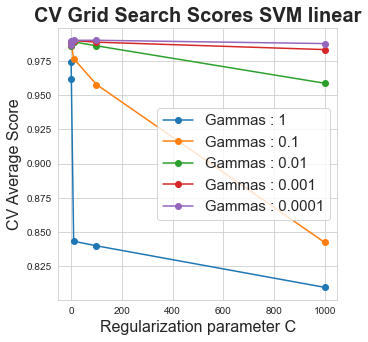

In [39]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=693)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Cs = [0.1, 1, 10, 100, 1000] #########################################
Gammas=[1, 0.1, 0.01, 0.001, 0.0001]
#Kernels = ["linear","poly","rbf","sigmoid","precomputed"]

grid = GridSearchCV(SVC(), dict(C=Cs,gamma=Gammas), refit = True, verbose = 3,cv=10, pre_dispatch='1*n_jobs', n_jobs=-1) 
  
    # fitting the model for grid search 
grid.fit(X_train, y_train) 

    #sorted(grid.cv_results_.keys())



scores_mean = grid.cv_results_['mean_test_score']
scores_mean = np.array(scores_mean).reshape(len(Cs),len(Gammas))

scores_sd = grid.cv_results_['std_test_score']
scores_sd = np.array(scores_sd).reshape(len(Cs),len(Gammas))

    # Plot Grid search scores
_, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
for idx, val in enumerate(Gammas):
    ax.plot(Cs, scores_mean[idx,:], '-o', label= 'Gammas : ' + str(val))
    
ax.set_title("CV Grid Search Scores SVM "+kernel, fontsize=20, fontweight='bold')
ax.set_xlabel('Regularization parameter C', fontsize=16)
ax.set_ylabel('CV Average Score', fontsize=16)
#ax.set_xticks(Cs, minor=False)
ax.legend(loc="best", fontsize=15)
ax.grid('on')
plt.show()

Train set: (9509, 9) (9509,)
Test set: (97, 9) (97,)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


0.9455555555555556 0.07377811244904013


[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


0.9477777777777778 0.07054461857488876


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


0.9485185185185183 0.06443699403505991


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


0.9450000000000001 0.07564333136666386


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


0.9453333333333334 0.07512425920425209


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


0.9459259259259257 0.0762135473593599


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  65 out of  70 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


0.9476190476190474 0.07571278824514968


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


0.9479166666666667 0.07634784250753623


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


0.9481481481481481 0.07683734802897742


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


0.9481111111111111 0.0760775270592886


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


0.9479797979797979 0.07580368966885112


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 115 out of 120 | elapsed:    6.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


0.947962962962963 0.07413400353488094


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


0.948034188034188 0.07367977458268542


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 135 out of 140 | elapsed:    7.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


0.9480952380952382 0.07230694489933337


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.8s finished


0.9474814814814817 0.07383550471033501


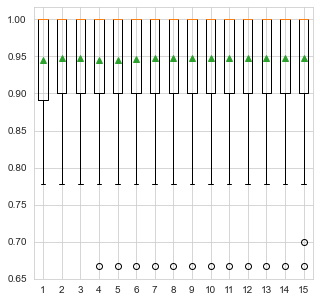

In [40]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    model = SVC(kernel='linear', C=0.1,gamma=0.0001)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv,verbose = 3,pre_dispatch='1*n_jobs', n_jobs=-1)
    return scores

results = []
rep = range(1,16)

for r in rep:
    s = evaluate_model(X_test, y_test, r)
    print(s.mean(),s.std())
    results.append(s)

plt.boxplot(results, labels=[str(r) for r in rep], showmeans=True)
plt.show() 

Putting it all together

In [41]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']


In [42]:
#train = 66%
#validation = 15%
#test = 15%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=693)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5) 

print ('\n Train set:', X_train.shape,  y_train.shape)
print ('\n Test set:', X_test.shape,  y_test.shape)
print ('\n Val set:', X_val.shape,  y_val.shape, '\n')


print(X_train.info())
print(X_val.info()) 
print(X_test.info())


 Train set: (6436, 9) (6436,)

 Test set: (1585, 9) (1585,)

 Val set: (1585, 9) (1585,) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6436 entries, 1516 to 7494
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TTL Value               6436 non-null   int64  
 1   Sum N-Gram Vectorizer   6436 non-null   int64  
 2   Average N-Gram-Feature  6436 non-null   float64
 3   Tfidf Delta             6436 non-null   float64
 4   Feature Count           6436 non-null   int64  
 5   N-GRAMS_DELTA_3         6436 non-null   int64  
 6   N-GRAMS_DELTA_4         6436 non-null   int64  
 7   N-GRAMS_DELTA_5         6436 non-null   int64  
 8   N-GRAMS_DELTA_6         6436 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 502.8 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585 entries, 3636 to 7855
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype

              precision    recall  f1-score   support

     ATTACK1       0.97      0.98      0.97       457
     ATTACK2       0.92      1.00      0.96       550
      NORMAL       0.99      0.82      0.89       315
   RESPONSES       1.00      1.00      1.00       263

    accuracy                           0.96      1585
   macro avg       0.97      0.95      0.96      1585
weighted avg       0.96      0.96      0.96      1585

Accuracy: 95.65% 

Confusion matrix, without normalization


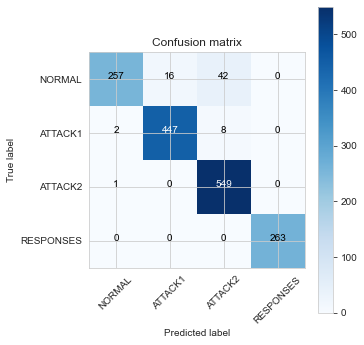

In [43]:
svm = SVC(kernel='linear',C=0.1,gamma=0.0001)
svm.fit(X_train, y_train)
yy = svm.predict(X_test)
    
cnf_matrix = confusion_matrix(y_test, yy, labels=['NORMAL','ATTACK1','ATTACK2','RESPONSES'])
np.set_printoptions(precision=5)
print (classification_report(y_test, yy))
print('Accuracy: %.2f%% \n' % (accuracy_score(yy,y_test)*100))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NORMAL','ATTACK1','ATTACK2','RESPONSES'], title='Confusion matrix')
    


In [44]:
pickle.dump(svm,open('SVMlinearmodel','wb'))

              precision    recall  f1-score   support

     ATTACK1       0.95      0.96      0.95       447
     ATTACK2       1.00      0.88      0.94       602
      NORMAL       0.79      0.98      0.87       276
   RESPONSES       1.00      1.00      1.00       260

    accuracy                           0.94      1585
   macro avg       0.93      0.95      0.94      1585
weighted avg       0.95      0.94      0.94      1585

Accuracy: 94.01% 

Confusion matrix, without normalization


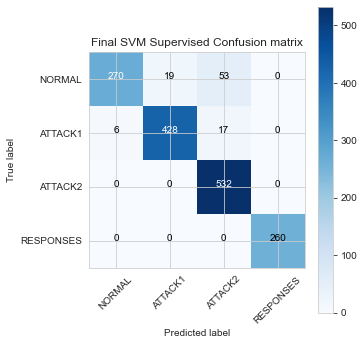

In [45]:
pickle_in = open('SVMlinearmodel','rb')
ex_svm = pickle.load(pickle_in)

ex_yy = ex_svm.predict(X_val)

cnf_matrix = confusion_matrix(y_val, ex_yy, labels=['NORMAL','ATTACK1','ATTACK2','RESPONSES'])
np.set_printoptions(precision=5)
print (classification_report(ex_yy,y_val))
print('Accuracy: %.2f%% \n' % (accuracy_score(ex_yy,y_val)*100))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NORMAL','ATTACK1','ATTACK2','RESPONSES'], title='Final SVM Supervised Confusion matrix')

In [46]:
#sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [47]:
wcss=[]


X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

#X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.9, random_state=693)
#print ('\n Train set:', X_.shape,  y_.shape)
#y_=y.astype('category')

y=y.astype('category')

#X = np.array(X)


In [48]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=300,  n_init=10,random_state=0) #, verbose=3)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [49]:
print(wcss)

[1303465874.8145342, 486947483.3306516, 161062672.52254757, 114459771.10883951, 78730500.14516833, 56047515.66550041, 44665441.29149623, 35477234.95506523, 25810435.08001889, 21971202.356638968]


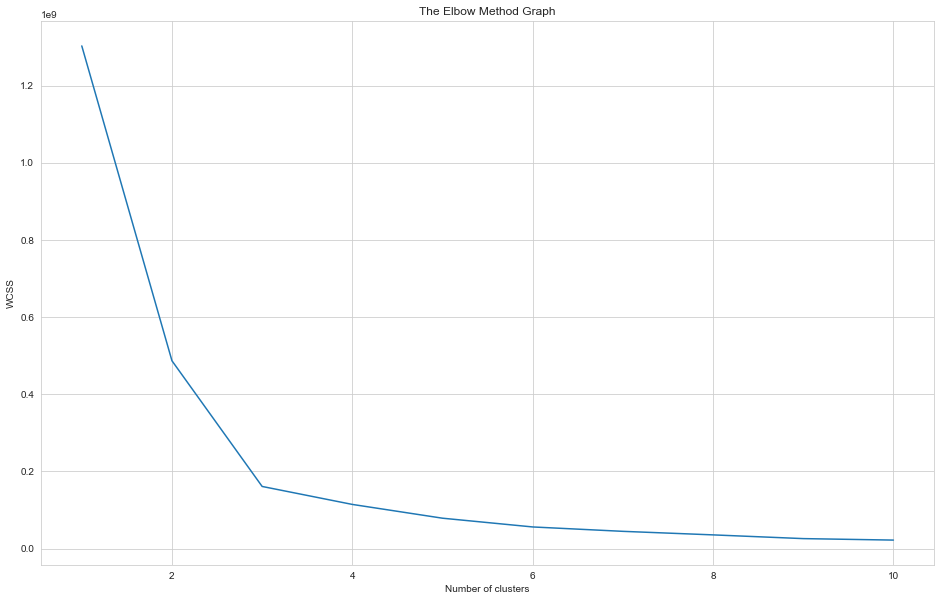

In [50]:
rcParams['figure.figsize'] = 16, 10
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [52]:
clusters = kmeans.fit_predict(X)

In [53]:
kmeans.cluster_centers_.shape


(4, 9)

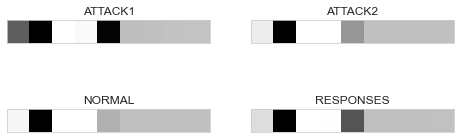

In [54]:
fig = plt.figure(figsize=(8, 3))
for i in range(len(y.cat.categories)):
    ax = fig.add_subplot(2, 2, 1 + i, xticks=[], yticks=[])
    ax.set_title(str(y.cat.categories[i]))
    ax.imshow(kmeans.cluster_centers_[i].reshape((1, 9)), cmap=plt.cm.binary)

In [55]:
X = np.array(X)
#y = np.array(y)

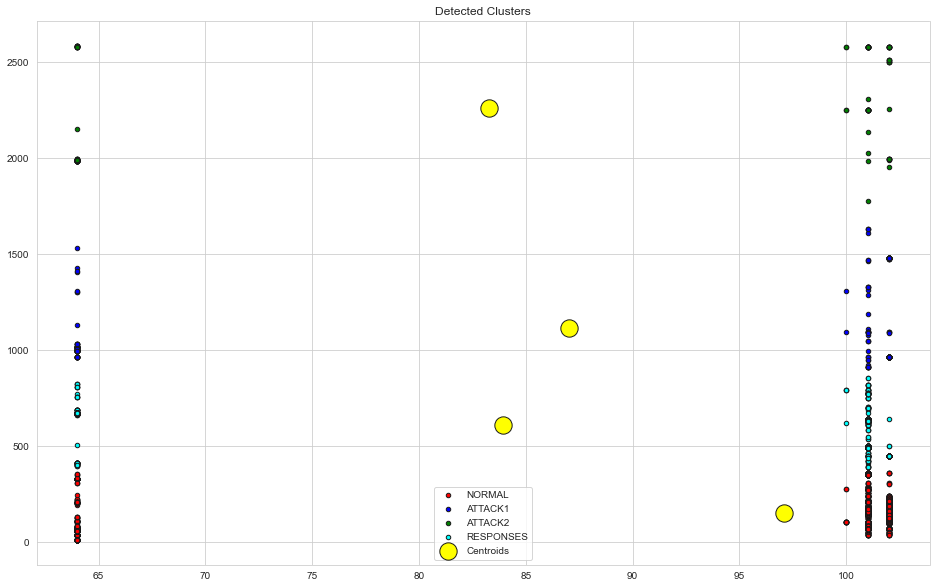

In [56]:
rcParams['figure.figsize'] = 16, 10

plt.scatter(X[clusters==0, 0], X[clusters==0, 1], c='red', cmap=cmap_bold, edgecolor='k', s=20,label ='NORMAL')
plt.scatter(X[clusters==1, 0], X[clusters==1, 1], c='blue', cmap=cmap_bold, edgecolor='k', s=20,label ='ATTACK1')
plt.scatter(X[clusters==2, 0], X[clusters==2, 1], c='green', cmap=cmap_bold, edgecolor='k', s=20,label ='ATTACK2')
plt.scatter(X[clusters==3, 0], X[clusters==3, 1], c='cyan', cmap=cmap_bold, edgecolor='k', s=20,label ='RESPONSES')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', cmap=cmap_bold, edgecolor='k', label = 'Centroids')
plt.title('Detected Clusters')
plt.legend()
plt.show()

In [57]:
strlabels = ['']*len(y)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = 'NORMAL'
    elif clusters[i]==1: strlabels[i] = 'ATTACK1'
    elif clusters[i]==2: strlabels[i] = 'ATTACK2'
    elif clusters[i]==3: strlabels[i] = 'RESPONSES'

accuracy_score(y, strlabels)*100.0

18.64459712679575

In [58]:
df_backup = df.copy(deep=True)
df_backup.info()

df_backup.drop('TTL Value', axis=1, inplace=True)
df_backup.drop('Sum N-Gram Vectorizer', axis=1, inplace=True)
df_backup.drop('Average N-Gram-Feature', axis=1, inplace=True)


X = df_backup.drop('Traffic Type',axis=1)
y = df_backup['Traffic Type']

y=y.astype('category')

    
df_backup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9606 entries, 4802 to 9605
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TTL Value               9606 non-null   int64  
 1   Sum N-Gram Vectorizer   9606 non-null   int64  
 2   Average N-Gram-Feature  9606 non-null   float64
 3   Tfidf Delta             9606 non-null   float64
 4   Feature Count           9606 non-null   int64  
 5   N-GRAMS_DELTA_3         9606 non-null   int64  
 6   N-GRAMS_DELTA_4         9606 non-null   int64  
 7   N-GRAMS_DELTA_5         9606 non-null   int64  
 8   N-GRAMS_DELTA_6         9606 non-null   int64  
 9   Traffic Type            9606 non-null   object 
dtypes: float64(2), int64(7), object(1)
memory usage: 788.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9606 entries, 4802 to 9605
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -------------

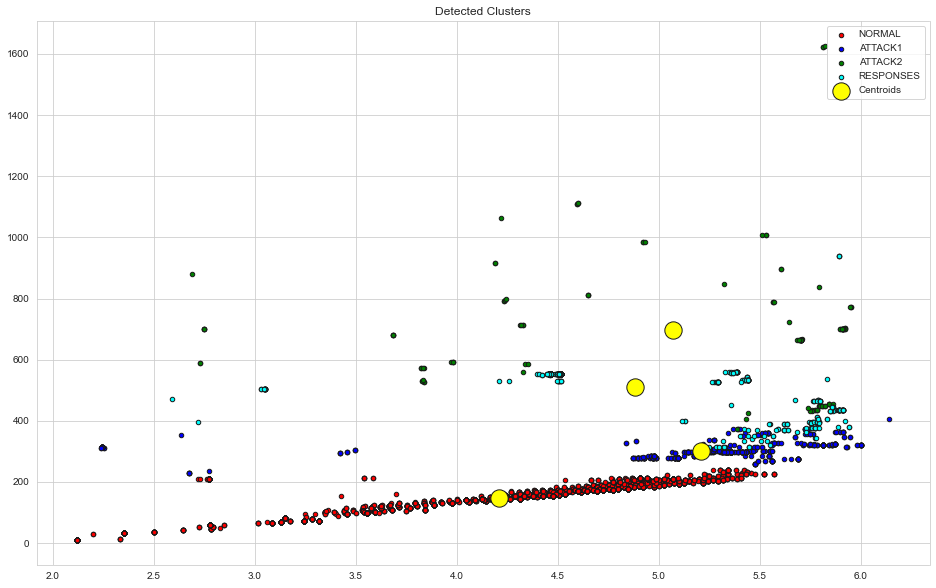

16.739537788881947

In [59]:
df_backup = df.copy(deep=True)
df_backup.drop('TTL Value', axis=1, inplace=True)
df_backup.drop('Sum N-Gram Vectorizer', axis=1, inplace=True)
df_backup.drop('Average N-Gram-Feature', axis=1, inplace=True)
X = df_backup.drop('Traffic Type',axis=1)
y = df_backup['Traffic Type']
y=y.astype('category')
X = np.array(X)
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
clusters = kmeans.fit_predict(X)
rcParams['figure.figsize'] = 16, 10
plt.scatter(X[clusters==0, 0], X[clusters==0, 1], c='red', cmap=cmap_bold, edgecolor='k', s=20,label ='NORMAL')
plt.scatter(X[clusters==1, 0], X[clusters==1, 1], c='blue', cmap=cmap_bold, edgecolor='k', s=20,label ='ATTACK1')
plt.scatter(X[clusters==2, 0], X[clusters==2, 1], c='green', cmap=cmap_bold, edgecolor='k', s=20,label ='ATTACK2')
plt.scatter(X[clusters==3, 0], X[clusters==3, 1], c='cyan', cmap=cmap_bold, edgecolor='k', s=20,label ='RESPONSES')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', cmap=cmap_bold, edgecolor='k', label = 'Centroids')
plt.title('Detected Clusters')
#plt.xlabel('')
#plt.ylabel('')
plt.legend()
plt.show()
strlabels = ['']*len(y)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = 'NORMAL'
    elif clusters[i]==1: strlabels[i] = 'ATTACK1'
    elif clusters[i]==2: strlabels[i] = 'ATTACK2'
    elif clusters[i]==3: strlabels[i] = 'RESPONSES'
accuracy_score(y, strlabels)*100.0

Finished


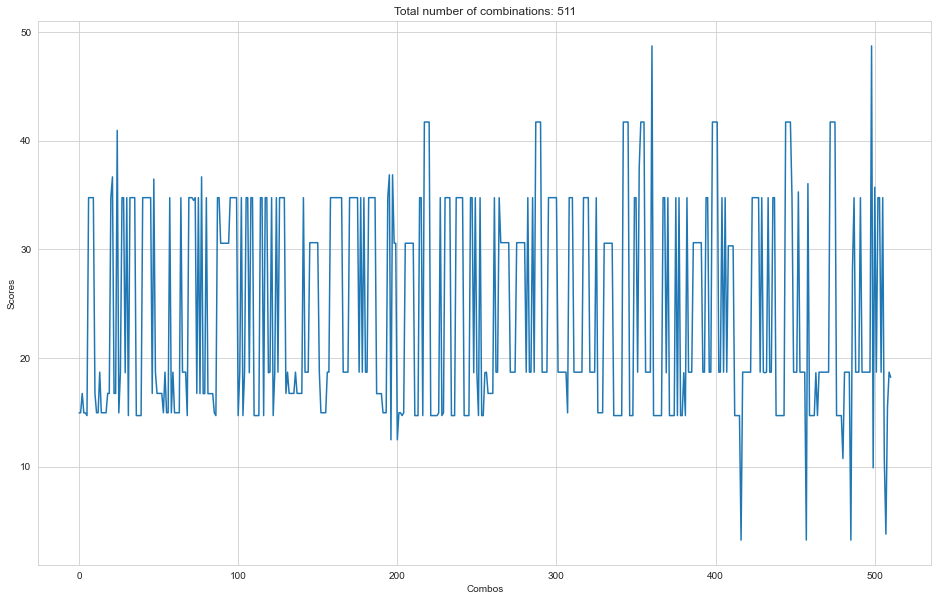

In [60]:
features = df.columns.tolist()
features = features[:-1]
combos = sum([list(map(list, combinations(features, i))) for i in range(len(features) + 1)], [])
kombo = []
scor = []
res = []

for c in combos:
    df_backup = df.copy(deep=True)
    #print(c)
    for elm in c:
        #print(elm)
        df_backup.drop(elm, axis=1, inplace=True)
    X = df_backup.drop('Traffic Type',axis=1)
    y = df_backup['Traffic Type']
    try:
        kmeans = KMeans(n_clusters=4, max_iter=300, n_init=10,random_state=0 )
        X = np.array(X)
        clusters = kmeans.fit_predict(X)
    except:
        print('Finished')
        #TODO 512 is max combo of 9 
        continue
        #traceback.print_exc()
   
    strlabels = ['']*len(y)
    for i in range(len(clusters)):
        if clusters[i]==0: strlabels[i] = 'NORMAL'
        elif clusters[i]==1: strlabels[i] = 'ATTACK1'
        elif clusters[i]==2: strlabels[i] = 'ATTACK2'
        elif clusters[i]==3: strlabels[i] = 'RESPONSES'
    score = accuracy_score(y, strlabels)*100.0 
    if score > 51: #41
        print("Accurancy score for combo :", c, " is :", score)
    kombo.append(c)
    scor.append(score)
    res.append([c,score])

x = np.arange(len(kombo))
rcParams['figure.figsize'] = 16, 10
plt.plot(x,scor)
plt.title('Total number of combinations: '+str(len(kombo)))
plt.xlabel('Combos')
plt.ylabel('Scores')
plt.show()


The results clearly indicate that thefollowing is the best combination:

In [61]:
print("Largest accurancy score is for features to drop: ", max(res, key=lambda x: x[1]))

Largest accurancy score is for features to drop:  [['Sum N-Gram Vectorizer', 'N-GRAMS_DELTA_3', 'N-GRAMS_DELTA_4', 'N-GRAMS_DELTA_5', 'N-GRAMS_DELTA_6'], 48.729960441390794]


Putting it all together:

Selected combination for further tests: 

Accurancy score for combo : ['TTL Value', 'Sum N-Gram Vectorizer', 'N-GRAMS_DELTA_3', 'N-GRAMS_DELTA_4', 'N-GRAMS_DELTA_5']  is : 41.723922548407245

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9606 entries, 4802 to 9605
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Average N-Gram-Feature  9606 non-null   float64
 1   Tfidf Delta             9606 non-null   float64
 2   Feature Count           9606 non-null   int64  
 3   N-GRAMS_DELTA_6         9606 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 375.2 KB


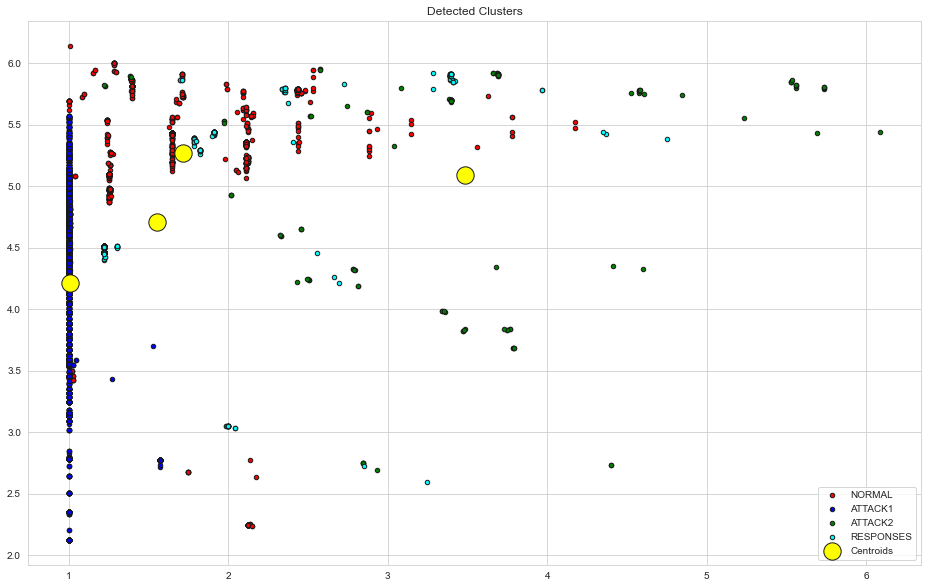

41.723922548407245

In [62]:
df_backup = df.copy(deep=True)
df_backup.drop('TTL Value', axis=1, inplace=True)
df_backup.drop('Sum N-Gram Vectorizer', axis=1, inplace=True)
df_backup.drop('N-GRAMS_DELTA_3', axis=1, inplace=True)
df_backup.drop('N-GRAMS_DELTA_4', axis=1, inplace=True)
df_backup.drop('N-GRAMS_DELTA_5', axis=1, inplace=True)
X = df_backup.drop('Traffic Type',axis=1)
X.info()
y = df_backup['Traffic Type']
y=y.astype('category')
X = np.array(X)
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
clusters = kmeans.fit_predict(X)
rcParams['figure.figsize'] = 16, 10
plt.scatter(X[clusters==0, 0], X[clusters==0, 1], c='red', cmap=cmap_bold, edgecolor='k', s=20,label ='NORMAL')
plt.scatter(X[clusters==1, 0], X[clusters==1, 1], c='blue', cmap=cmap_bold, edgecolor='k', s=20,label ='ATTACK1')
plt.scatter(X[clusters==2, 0], X[clusters==2, 1], c='green', cmap=cmap_bold, edgecolor='k', s=20,label ='ATTACK2')
plt.scatter(X[clusters==3, 0], X[clusters==3, 1], c='cyan', cmap=cmap_bold, edgecolor='k', s=20,label ='RESPONSES')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', cmap=cmap_bold, edgecolor='k', label = 'Centroids')
plt.title('Detected Clusters')
#plt.xlabel('')
#plt.ylabel('')
plt.legend()
plt.show()
strlabels = ['']*len(clusters)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = 'NORMAL'
    elif clusters[i]==1: strlabels[i] = 'ATTACK1'
    elif clusters[i]==2: strlabels[i] = 'ATTACK2'
    elif clusters[i]==3: strlabels[i] = 'RESPONSES'
accuracy_score(y, strlabels)*100.0

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, PCA is implemented as a transformer object that learns  components in its fit method, and can be used on new data to project it on these components. https://scikit-learn.org/stable/modules/decomposition.html#pca

In [63]:
df_backup = df.copy(deep=True)
X = df_backup.drop('Traffic Type',axis=1)
y = df_backup['Traffic Type']
y=y.astype('category')
X = np.array(X)


In [64]:
scaler = StandardScaler()
scaled_ = scaler.fit_transform(X)

In [65]:
pca = PCA()
pca.fit(scaled_)

PCA()

In [66]:
pca_ratio = pca.explained_variance_ratio_

In [67]:
pca_ratio_sum = pca.explained_variance_ratio_.cumsum()


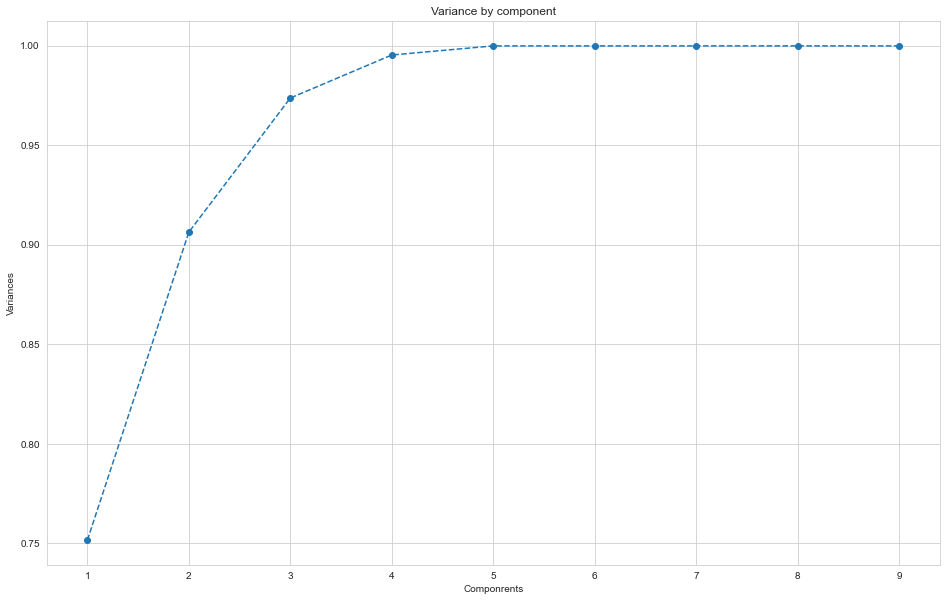

In [68]:
rcParams['figure.figsize'] = 16, 10
plt.plot(range(1,10), pca_ratio_sum, marker = 'o', linestyle= "--")
plt.title('Variance by component')
plt.xlabel('Componrents')
plt.ylabel('Variances')
plt.show()

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 3 components.

In [69]:
pca = PCA(n_components=3)
pca.fit(scaled_)

PCA(n_components=3)

In [70]:
pca_means = pca.transform(scaled_)

In [71]:
kmeans_pca = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=44 )
clusters = kmeans_pca.fit_predict(pca_means)

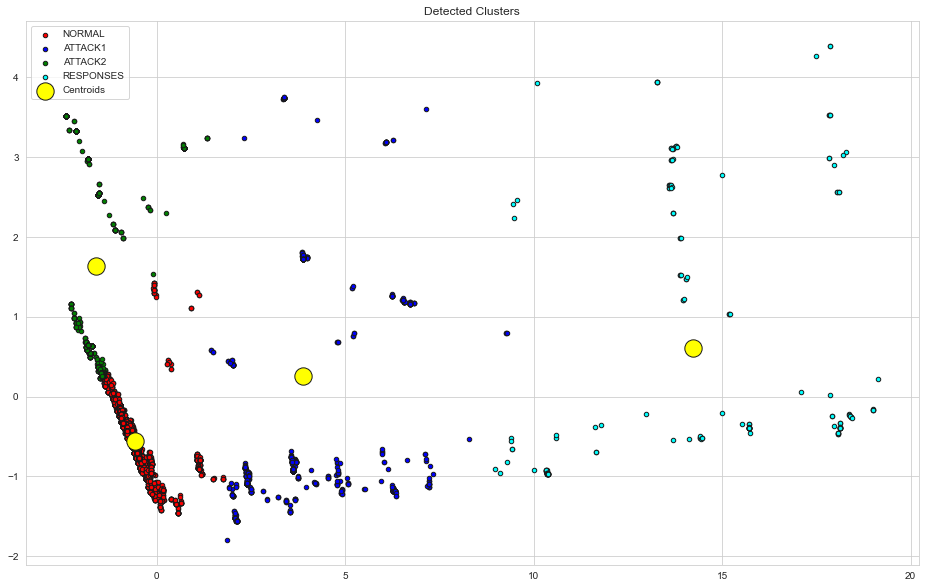

In [72]:
plt.scatter(pca_means[clusters==0, 0], pca_means[clusters==0, 1], c='red', cmap=cmap_bold, edgecolor='k', s=20,label ='NORMAL')
plt.scatter(pca_means[clusters==1, 0], pca_means[clusters==1, 1], c='blue', cmap=cmap_bold, edgecolor='k', s=20,label ='ATTACK1')
plt.scatter(pca_means[clusters==2, 0], pca_means[clusters==2, 1], c='green', cmap=cmap_bold, edgecolor='k', s=20,label ='ATTACK2')
plt.scatter(pca_means[clusters==3, 0], pca_means[clusters==3, 1], c='cyan', cmap=cmap_bold, edgecolor='k', s=20,label ='RESPONSES')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='yellow', cmap=cmap_bold, edgecolor='k', label = 'Centroids')
plt.title('Detected Clusters')
#plt.xlabel('')
#plt.ylabel('')
plt.legend()
plt.show()

In [73]:
strlabels = ['']*len(clusters)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = 'NORMAL'
    elif clusters[i]==1: strlabels[i] = 'ATTACK1'
    elif clusters[i]==2: strlabels[i] = 'ATTACK2'
    elif clusters[i]==3: strlabels[i] = 'RESPONSES'
accuracy_score(y, strlabels)*100.0

5.53820528836144

In [74]:
y_codes =  np.asarray(y.cat.codes)

[3 1 1 ... 2 2 2]


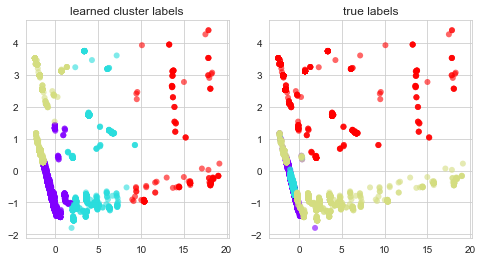

In [75]:
labels = np.zeros_like(clusters) # Create an array of 0s with equal length ot the number of clusters

# Set labels based on the modes of the target
for i in range(len(y.cat.categories)):
    mask = (clusters == i)
    labels[mask] = stats.mode(y_codes[mask])[0]
print (labels)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 4),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(pca_means[:, 0], pca_means[:, 1], c=clusters, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(pca_means[:, 0], pca_means[:, 1], c=y_codes, **kwargs)
ax[1].set_title('true labels');

Confusion matrix, without normalization


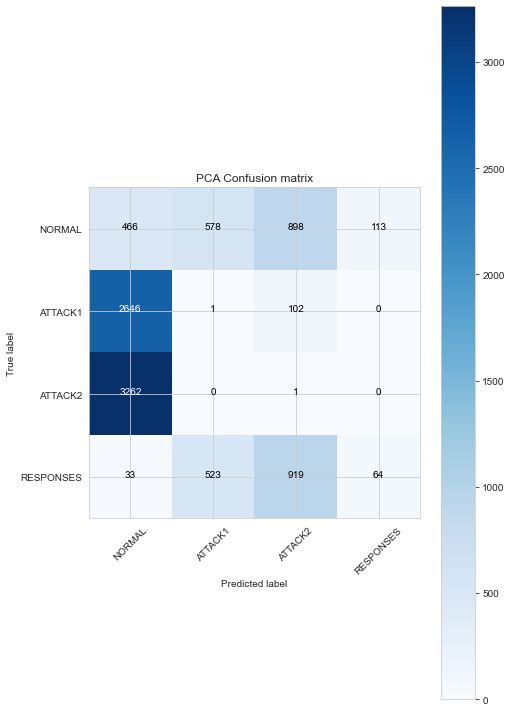

In [76]:
rcParams['figure.figsize'] = 7, 10
cm=confusion_matrix(y, strlabels, labels=['NORMAL','ATTACK1','ATTACK2','RESPONSES'])

plot_confusion_matrix(cm, classes=['NORMAL','ATTACK1','ATTACK2','RESPONSES'],normalize= False, title= 'PCA Confusion matrix')

Returning to original idea to export mode for integration with code anf further analisis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9606 entries, 4802 to 9605
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Average N-Gram-Feature  9606 non-null   float64
 1   Tfidf Delta             9606 non-null   float64
 2   Feature Count           9606 non-null   int64  
 3   N-GRAMS_DELTA_6         9606 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 375.2 KB


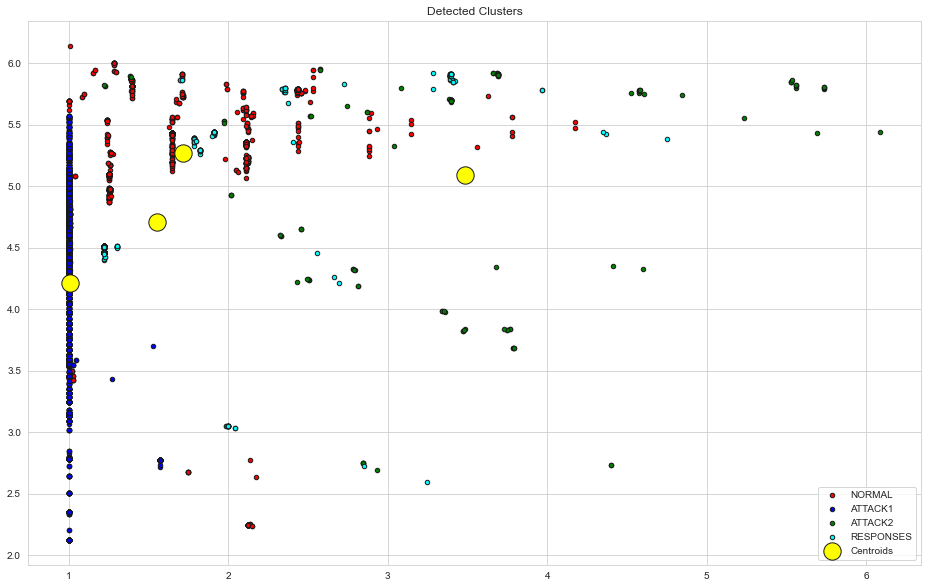

41.723922548407245

In [77]:
df_backup = df.copy(deep=True)
df_backup.drop('TTL Value', axis=1, inplace=True)
df_backup.drop('Sum N-Gram Vectorizer', axis=1, inplace=True)
df_backup.drop('N-GRAMS_DELTA_3', axis=1, inplace=True)
df_backup.drop('N-GRAMS_DELTA_4', axis=1, inplace=True)
df_backup.drop('N-GRAMS_DELTA_5', axis=1, inplace=True)
X = df_backup.drop('Traffic Type',axis=1)
X.info()
y = df_backup['Traffic Type']
y=y.astype('category')
X = np.array(X)
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
clusters = kmeans.fit_predict(X)
rcParams['figure.figsize'] = 16, 10
plt.scatter(X[clusters==0, 0], X[clusters==0, 1], c='red', cmap=cmap_bold, edgecolor='k', s=20,label ='NORMAL')
plt.scatter(X[clusters==1, 0], X[clusters==1, 1], c='blue', cmap=cmap_bold, edgecolor='k', s=20,label ='ATTACK1')
plt.scatter(X[clusters==2, 0], X[clusters==2, 1], c='green', cmap=cmap_bold, edgecolor='k', s=20,label ='ATTACK2')
plt.scatter(X[clusters==3, 0], X[clusters==3, 1], c='cyan', cmap=cmap_bold, edgecolor='k', s=20,label ='RESPONSES')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', cmap=cmap_bold, edgecolor='k', label = 'Centroids')
plt.title('Detected Clusters')
#plt.xlabel('')
#plt.ylabel('')
plt.legend()
plt.show()
strlabels = ['']*len(clusters)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = 'NORMAL'
    elif clusters[i]==1: strlabels[i] = 'ATTACK1'
    elif clusters[i]==2: strlabels[i] = 'ATTACK2'
    elif clusters[i]==3: strlabels[i] = 'RESPONSES'
accuracy_score(y, strlabels)*100.0

[1 1 1 ... 3 3 2]


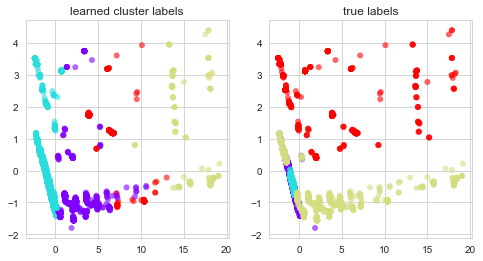

In [78]:
labels = np.zeros_like(clusters) # Create an array of 0s with equal length ot the number of clusters

# Set labels based on the modes of the target
for i in range(len(y.cat.categories)):
    mask = (clusters == i)
    labels[mask] = stats.mode(y_codes[mask])[0]
print (labels)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 4),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(pca_means[:, 0], pca_means[:, 1], c=clusters, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(pca_means[:, 0], pca_means[:, 1], c=y_codes, **kwargs)
ax[1].set_title('true labels');

Confusion matrix, without normalization


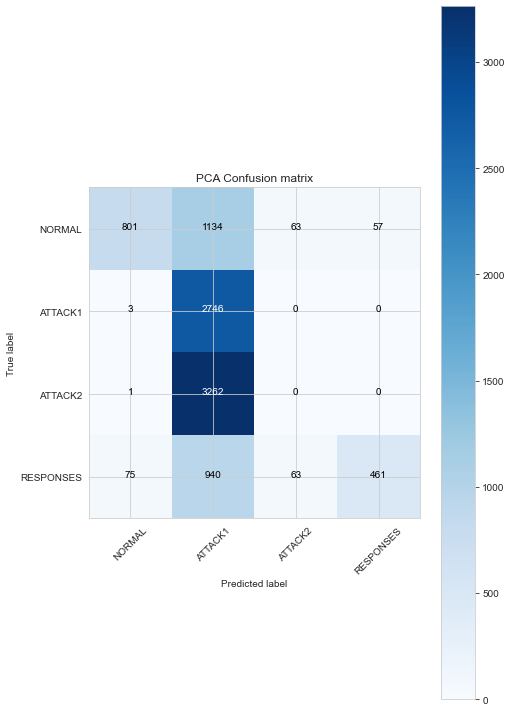

In [79]:
rcParams['figure.figsize'] = 7, 10
cm=confusion_matrix(y, strlabels, labels=['NORMAL','ATTACK1','ATTACK2','RESPONSES'])

plot_confusion_matrix(cm, classes=['NORMAL','ATTACK1','ATTACK2','RESPONSES'],normalize= False, title= 'PCA Confusion matrix')

In [80]:
pickle.dump(kmeans,open('KMeans_Clustering','wb'))

In [81]:
pickle_in = open('KMeans_Clustering','rb')

ex_kmeans = pickle.load(pickle_in)





<class 'pandas.core.frame.DataFrame'>
Int64Index: 9606 entries, 4802 to 9605
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Average N-Gram-Feature  9606 non-null   float64
 1   Tfidf Delta             9606 non-null   float64
 2   Feature Count           9606 non-null   int64  
 3   N-GRAMS_DELTA_6         9606 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 375.2 KB


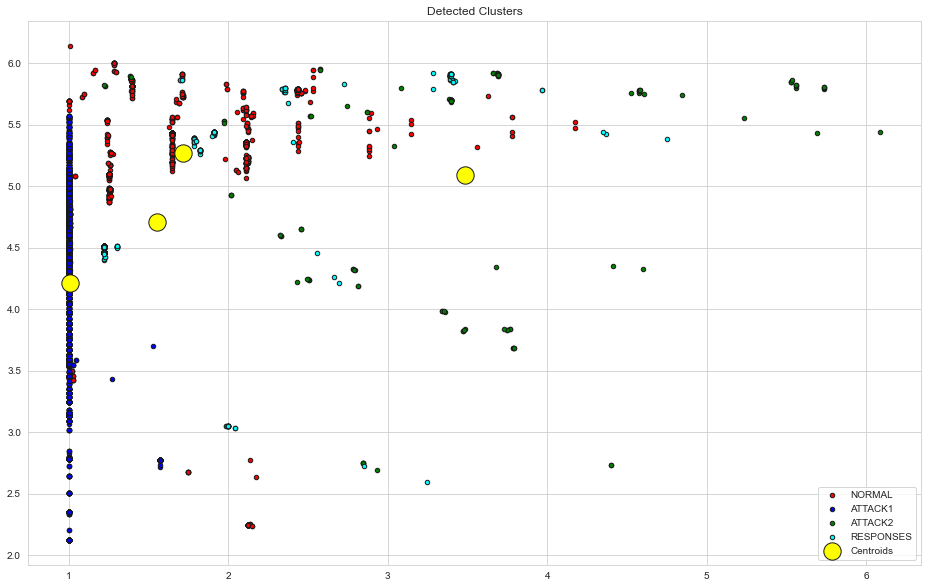

41.723922548407245

In [82]:
df_backup = df.copy(deep=True)
df_backup.drop('TTL Value', axis=1, inplace=True)
df_backup.drop('Sum N-Gram Vectorizer', axis=1, inplace=True)
df_backup.drop('N-GRAMS_DELTA_3', axis=1, inplace=True)
df_backup.drop('N-GRAMS_DELTA_4', axis=1, inplace=True)
df_backup.drop('N-GRAMS_DELTA_5', axis=1, inplace=True)
X = df_backup.drop('Traffic Type',axis=1)
X.info()
y = df_backup['Traffic Type']
y=y.astype('category')
X = np.array(X)



clusters = ex_kmeans.fit_predict(X)

rcParams['figure.figsize'] = 16, 10
plt.scatter(X[clusters==0, 0], X[clusters==0, 1], c='red', cmap=cmap_bold, edgecolor='k', s=20,label ='NORMAL')
plt.scatter(X[clusters==1, 0], X[clusters==1, 1], c='blue', cmap=cmap_bold, edgecolor='k', s=20,label ='ATTACK1')
plt.scatter(X[clusters==2, 0], X[clusters==2, 1], c='green', cmap=cmap_bold, edgecolor='k', s=20,label ='ATTACK2')
plt.scatter(X[clusters==3, 0], X[clusters==3, 1], c='cyan', cmap=cmap_bold, edgecolor='k', s=20,label ='RESPONSES')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', cmap=cmap_bold, edgecolor='k', label = 'Centroids')
plt.title('Detected Clusters')
#plt.xlabel('')
#plt.ylabel('')
plt.legend()
plt.show()
strlabels = ['']*len(clusters)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = 'NORMAL'
    elif clusters[i]==1: strlabels[i] = 'ATTACK1'
    elif clusters[i]==2: strlabels[i] = 'ATTACK2'
    elif clusters[i]==3: strlabels[i] = 'RESPONSES'
accuracy_score(y, strlabels)*100.0

Accuracy: 41.72% 

Confusion matrix, without normalization


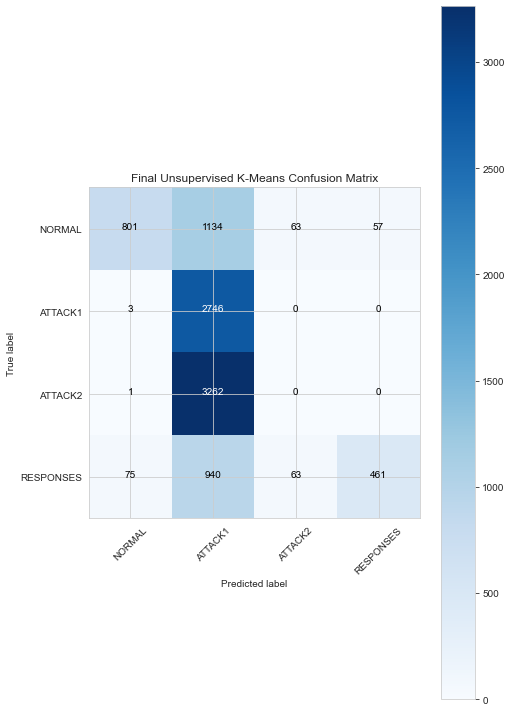

In [83]:
cnf_matrix = confusion_matrix(y, strlabels, labels=['NORMAL','ATTACK1','ATTACK2','RESPONSES']) 
np.set_printoptions(precision=5)

print('Accuracy: %.2f%% \n' % (accuracy_score(y, strlabels)*100.0))

rcParams['figure.figsize'] = 7, 10 
plot_confusion_matrix(cnf_matrix, classes=['NORMAL','ATTACK1','ATTACK2','RESPONSES'], title='Final Unsupervised K-Means Confusion Matrix')

[1 1 1 ... 3 3 2]


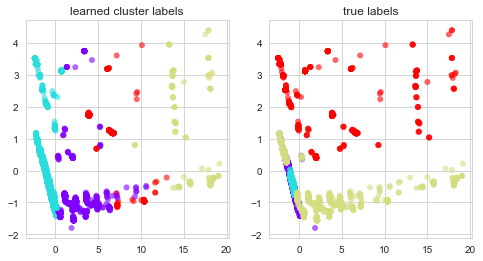

In [84]:
labels = np.zeros_like(clusters) # Create an array of 0s with equal length ot the number of clusters

# Set labels based on the modes of the target
for i in range(len(y.cat.categories)):
    mask = (clusters == i)
    labels[mask] = stats.mode(y_codes[mask])[0]
print (labels)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 4),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(pca_means[:, 0], pca_means[:, 1], c=clusters, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(pca_means[:, 0], pca_means[:, 1], c=y_codes, **kwargs)
ax[1].set_title('true labels');